# Python for Data Analysis


In [2]:
#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting
%matplotlib inline

Pandas is a python package that deals mostly with :
- **Series**  (1d homogeneous array)
- **DataFrame** (2d labeled heterogeneous array) 
- **Panel** (general 3d array)

### Pandas Series

Pandas *Series* is one-dimentional labeled array containing data of the same type (integers, strings, floating point numbers, Python objects, etc. ). The axis labels are often referred to as *index*.

In [3]:
# Example of creating Pandas series :
s1 = pd.Series( [-3,-1,1,3,5] )
print(s1)

0   -3
1   -1
2    1
3    3
4    5
dtype: int64


We did not pass any index, so by default, it assigned the indexes ranging from 0 to len(data)-1

In [4]:
# View index values
print(s1.index)

RangeIndex(start=0, stop=5, step=1)


In [5]:
# Creating Pandas series with index:
s2 = pd.Series( np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'] )
print(s2)

a   -0.899955
b   -1.506800
c    1.033994
d    0.786458
e    0.107477
dtype: float64


In [6]:
# View index values
print(s2.index)

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')


In [7]:
# Create a Series from dictionary
data = {'pi': 3.1415, 'e': 2.71828}  # dictionary
print(data)
s3 = pd.Series ( data )
print(s3)

{'pi': 3.1415, 'e': 2.71828}
pi    3.14150
e     2.71828
dtype: float64


In [8]:
# reordering the elements
s4 = pd.Series ( data, index = ['e', 'pi', 'tau'])
print(s4)

e      2.71828
pi     3.14150
tau        NaN
dtype: float64


NAN (non a number) - is used to specify a missing value in Pandas.

In [9]:
s1[:2] # First 2 elements


0   -3
1   -1
dtype: int64

In [10]:
print( s1[ [2,1,0]])  # Elements out of order

2    1
1   -1
0   -3
dtype: int64


In [11]:
type(s1)

pandas.core.series.Series

In [12]:
# Series can be used as a usual one-dimentional array (ndarray):
print("Median:" , s4.median())

Median: 2.9298900000000003


In [13]:
s1[s1 > 0]

2    1
3    3
4    5
dtype: int64

In [14]:
# numpy methods can be used on series as usual:
s4[s4 > s4.median()]

pi    3.1415
dtype: float64

#### Attributes and Methods:

|  Attribute/Method | Description |
|-----|-----|
| dtype | data type of values in series |
| empty | True if series is empty |
| size | number of elements |
| values | Returns values as ndarray |
| head() | First n elements |
| tail() | Last n elements |

Execute *dir(s1)* to see all attributes and methods

*Exercise* 

In [15]:
# Create a series of your choice and explore it
# <your code goes here >
# mys = pd.Series(  ...  )
# print(mys)

In [16]:
# mys.head()

In [17]:
# mys.empty

### Pandas DataFrame

Pandas *DataFrame* is two-dimensional, size-mutable, heterogeneous tabular data structure with labeled rows and columns ( axes ). Can be thought of a dictionary-like container to store python Series objects.

In [18]:
d =  pd.DataFrame({ 'Name': pd.Series(['Alice','Bob','Chris']), 
                  'Age': pd.Series([ 21,25,23]) } )
print(d)

    Name  Age
0  Alice   21
1    Bob   25
2  Chris   23


In [19]:
d2 = pd.DataFrame(np.array([['Alice','Bob','Chris'],[ 21,25,23]]).T, columns=['Name','Age'])

In [20]:
d2

,Name,Age
0,Alice,21
1,Bob,25
2,Chris,23


In [21]:
#Add a new column:
d['height'] = pd.Series([5.2,6.0,5.6])
d

,Name,Age,height
0,Alice,21,5.2
1,Bob,25,6.0
2,Chris,23,5.6


In [22]:
#Read csv file
df = pd.read_csv("Salaries.csv")

Before we can perform any analysis on the data we need to


*   Check if the data were imported correctly
*   Check types of each column
*   How many missing values each column has

We should them carefully prepare the data:

*   Remove columns that we do not need for our analysis
*   Rename columns if necessary
*   Possibly rearrange the columns to make it easier to work with them
*   Create new columns or modify existing (i.g. convert into different units) if necessary






In [26]:
#Display a few first records
df.head()

,rank,discipline,phd,service,sex,salary
73,Prof,B,18,10,Female,105450
74,AssocProf,B,19,6,Female,104542
75,Prof,B,17,17,Female,124312
76,Prof,A,28,14,Female,109954
77,Prof,A,23,15,Female,109646


In [27]:
# Display structure of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        78 non-null     object
 1   discipline  78 non-null     object
 2   phd         78 non-null     int64 
 3   service     78 non-null     int64 
 4   sex         78 non-null     object
 5   salary      78 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 3.8+ KB


Sometimes the column names in the input file are too long or contain special characters. In these cases to make it easier to work with these columns, we need to rename them.

In [28]:
# Let's create a copy of this dataframe with a new column names
# If we do not want to create a new data frame, we can add inplace=True argument
df_new =df.rename(columns={
        'discipline': 'subject', 
        'sex': 'gender'
    })

---
*Exercise* 

In [ ]:
#Display first 10 records
# <your code goes here>

In [ ]:
#Display first 20 records
# <your code goes here>

In [ ]:
#Display the last 5 records
# <your code goes here>

---

### Data Exploration

In [29]:
#Identify the type of df object
type(df)

pandas.core.frame.DataFrame

In [30]:
#Check the type of a column "salary"
df['salary'].dtype

dtype('int64')

In [31]:
#List the types of all columns
df.dtypes

rank          object
discipline    object
phd            int64
service        int64
sex           object
salary         int64
dtype: object

In [32]:
#List the column names
df.columns

Index(['rank', 'discipline', 'phd', 'service', 'sex', 'salary'], dtype='object')

In [33]:
#List the row labels and the column names
df.axes

[RangeIndex(start=0, stop=78, step=1),
 Index(['rank', 'discipline', 'phd', 'service', 'sex', 'salary'], dtype='object')]

In [34]:
#Total number of elements in the Data Frame
df.size

468

In [35]:
#Number of rows and columns
df.shape

(78, 6)

In [39]:
#Output basic statistics for the numeric columns
df.describe()

,phd,service,salary
count,78.000000,78.000000,78.000000
mean,19.705128,15.051282,108023.782051
std,12.498425,12.139768,28293.661022
min,1.000000,0.000000,57800.000000
25%,10.250000,5.250000,88612.500000
50%,18.500000,14.500000,104671.000000
75%,27.750000,20.750000,126774.750000
max,56.000000,51.000000,186960.000000


*Get help*   
df.describe?

In [ ]:
df.describe?

In [ ]:
# Create a new column
df = df.assign( salary_k = lambda x: x.salary/1000.0)
df.head(10)

In [43]:
# Check how many unique values in a column
df['rank'].unique()

array(['Prof', 'AssocProf', 'AsstProf'], dtype=object)

In [42]:
# Get frequency table for a categorical or binary column
df['rank'].value_counts()

Prof         46
AsstProf     19
AssocProf    13
Name: rank, dtype: int64

In [51]:
# Get a proportion table
df['rank'].value_counts()/sum(df['rank'].value_counts())

Prof         0.589744
AsstProf     0.243590
AssocProf    0.166667
Name: rank, dtype: float64

In [52]:
#Alternatively we can use pandas function crosstab()
pd.crosstab(index=df['rank'], columns="count")

col_0,count
rank,
AssocProf,13
AsstProf,19
Prof,46


In [53]:
# Two-way tables
pd.crosstab(index=df['rank'], columns=df['discipline'], margins=True)

discipline,A,B,All
rank,,,
AssocProf,5,8,13
AsstProf,8,11,19
Prof,23,23,46
All,36,42,78


---
### Data slicing and grouping

In [54]:
#Extract a column by name 
df['sex'].head()

0    Male
1    Male
2    Male
3    Male
4    Male
Name: sex, dtype: object

In [55]:
# If the column name does not contain spaces or other special characters and does not collide with data frame methods, we can use a dot notation
df.sex.head()

0    Male
1    Male
2    Male
3    Male
4    Male
Name: sex, dtype: object

In [56]:
# Calculate median number of service years
df.service.median()

14.5

---
*Exercise* 

In [ ]:
# Calculate the basic statistics for the salary column (used describe() method)
# <your code goes here>

In [ ]:
# Calculate how many values in the salary column (use count() method)
# <your code goes here>

In [ ]:
# Calculate the average (mean) salary

---

In [57]:
#Group data using rank
df_rank = df.groupby('rank')

In [58]:
#Calculate mean of all numeric columns for the grouped object
df_rank.mean()

,phd,service,salary
rank,,,
AssocProf,15.076923,11.307692,91786.230769
AsstProf,5.052632,2.210526,81362.789474
Prof,27.065217,21.413043,123624.804348


In [59]:
# Most of the time, the "grouping" object is not stored, but is used as a step in getting a summary:
df.groupby('sex').mean()

,phd,service,salary
sex,,,
Female,16.512821,11.564103,101002.410256
Male,22.897436,18.538462,115045.153846


In [60]:
#Calculate the mean salary for men and women. The following produce Pandas Series (single brackets around salary)
df.groupby('sex')['salary'].mean()

sex
Female    101002.410256
Male      115045.153846
Name: salary, dtype: float64

In [ ]:
# If we use double brackets Pandas will produce a DataFrame
df.groupby('sex')[['salary']].mean()

In [ ]:
# Group using 2 variables - sex and rank:
df.groupby(['rank','sex'], sort=True)[['salary']].mean()

---
*Exercise* 

In [62]:
# Group data by the discipline and find the average salary for each group

---
### Filtering

In [63]:
#Select observation with the value in the salary column > 120K
df_sub = df[ df.salary > 120000]
df_sub.head()

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
3,Prof,A,40,31,Male,131205
5,Prof,A,20,20,Male,122400
7,Prof,A,18,18,Male,126300
10,Prof,B,39,33,Male,128250


In [64]:
df_sub.axes

[Int64Index([ 0,  3,  5,  7, 10, 11, 13, 14, 15, 19, 26, 27, 29, 31, 35, 36, 39,
             40, 44, 45, 49, 51, 58, 72, 75],
            dtype='int64'),
 Index(['rank', 'discipline', 'phd', 'service', 'sex', 'salary'], dtype='object')]

In [ ]:
#Select data for female professors
df_w = df[ df.sex == 'Female']
df_w.head()

In [ ]:
# To subset one column using a condition in another columns use method "where"
df.salary.where(df.sex=='Female').dropna().head(6)

---
*Exercise* 

In [69]:
# Using filtering, find the mean value of the salary for the discipline A

---
### More on slicing the dataset

In [74]:
#Select column salary
salary = df['salary']

In [75]:
#Check data type of the result
type(salary)

pandas.core.series.Series

In [76]:
#Look at the first few elements of the output
salary.head()

0    186960
1     93000
2    110515
3    131205
4    104800
Name: salary, dtype: int64

In [77]:
#Select column salary and make the output to be a data frame
df2 = df[['salary']]

In [78]:
#Check the type
type(df2)

pandas.core.frame.DataFrame

In [79]:
#Select a subset of rows (based on their position):
# Note 1: The location of the first row is 0
# Note 2: The last value in the range is not included
df[0:10]

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
5,Prof,A,20,20,Male,122400
6,AssocProf,A,20,17,Male,81285
7,Prof,A,18,18,Male,126300
8,Prof,A,29,19,Male,94350
9,Prof,A,51,51,Male,57800


In [80]:
#If we want to select both rows and columns we can use method .loc
df.loc[10:20,['rank', 'sex','salary']]

,rank,sex,salary
10,Prof,Male,128250
11,Prof,Male,134778
12,AsstProf,Male,88000
13,Prof,Male,162200
14,Prof,Male,153750
15,Prof,Male,150480
16,AsstProf,Male,75044
17,AsstProf,Male,92000
18,Prof,Male,107300
19,Prof,Male,150500


In [81]:
df_sub.head(15)

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
5,Prof,A,20,20,Male,122400
7,Prof,A,18,18,Male,126300
10,Prof,B,39,33,Male,128250
11,Prof,B,23,23,Male,134778
13,Prof,B,35,33,Male,162200
14,Prof,B,25,19,Male,153750


In [82]:
#Let's see what we get for our df_sub data frame
# Method .loc subset the data frame based on the labels:
df_sub.loc[10:20,['rank','sex','salary']]

,rank,sex,salary
10,Prof,Male,128250
11,Prof,Male,134778
13,Prof,Male,162200
14,Prof,Male,153750
15,Prof,Male,150480
18,Prof,Male,107300
19,Prof,Male,150500


In [83]:
#  Unlike method .loc, method iloc selects rows (and columns) by poistion:
df_sub.iloc[10:20, [0,3,4,5]]

,rank,service,sex,salary
15,Prof,3,Male,150480
18,Prof,7,Male,107300
19,Prof,27,Male,150500
21,Prof,30,Male,103106
26,Prof,19,Male,148750
27,Prof,43,Male,155865
29,Prof,20,Male,123683
30,AssocProf,7,Male,107008
31,Prof,21,Male,155750
32,Prof,19,Male,103275


### Sorting the Data

In [84]:
#Sort the data frame by yrs.service and create a new data frame
df_sorted = df.sort_values(by = 'service')
df_sorted.head()

,rank,discipline,phd,service,sex,salary
55,AsstProf,A,2,0,Female,72500
23,AsstProf,A,2,0,Male,85000
43,AsstProf,B,5,0,Female,77000
17,AsstProf,B,4,0,Male,92000
12,AsstProf,B,1,0,Male,88000


In [85]:
#Sort the data frame by yrs.service and overwrite the original dataset
df.sort_values(by = 'service', ascending = False, inplace = True)
df.head()

,rank,discipline,phd,service,sex,salary
9,Prof,A,51,51,Male,57800
0,Prof,B,56,49,Male,186960
36,Prof,B,45,45,Male,146856
27,Prof,A,45,43,Male,155865
40,Prof,A,39,36,Female,137000


In [ ]:
# Restore the original order (by sorting using index)
df.sort_index(axis=0, ascending = True, inplace = True)
df.head()

*Exercise* 

In [87]:
# Sort data frame by the salary (in descending order) and display the first few records of the output (head)

---

In [ ]:
#Sort the data frame using 2 or more columns:
df_sorted = df.sort_values(by = ['service', 'salary'], ascending = [True,False])
df_sorted.head(10)

### Missing Values

In [88]:
# Read a dataset with missing values
flights = pd.read_csv("flights.csv")
flights.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
4,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0


In [ ]:
flights.info()

In [89]:
# Select the rows that have at least one missing value
flights[flights.isnull().any(axis=1)].head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
330,2013,1,1,1807.0,29.0,2251.0,NaN,UA,N31412,1228,EWR,SAN,NaN,2425,18.0,7.0
403,2013,1,1,NaN,NaN,NaN,NaN,AA,N3EHAA,791,LGA,DFW,NaN,1389,NaN,NaN
404,2013,1,1,NaN,NaN,NaN,NaN,AA,N3EVAA,1925,LGA,MIA,NaN,1096,NaN,NaN
855,2013,1,2,2145.0,16.0,NaN,NaN,UA,N12221,1299,EWR,RSW,NaN,1068,21.0,45.0
858,2013,1,2,NaN,NaN,NaN,NaN,AA,NaN,133,JFK,LAX,NaN,2475,NaN,NaN


In [92]:
# Filter all the rows where arr_delay value is missing:
flights1 = flights[ flights['arr_delay'].notnull( )]
flights1.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
4,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0


In [ ]:
# Remove all the observations with missing values
flights2 = flights.dropna()

In [ ]:
# Fill missing values with zeros
nomiss =flights['dep_delay'].fillna(0)
nomiss.isnull().any()

---
*Exercise* 

In [102]:
# Count how many missing data are in dep_delay and arr_delay columns

---
### Common Aggregation Functions:

|Function|Description
|-------|--------
|min   | minimum
|max   | maximum
|count   | number of non-null observations
|sum   | sum of values
|mean  | arithmetic mean of values
|median | median
|mad | mean absolute deviation
|mode | mode
|prod   | product of values
|std  | standard deviation
|var | unbiased variance



In [103]:
# Find the number of non-missing values in each column
flights.describe()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute
count,160754.0,160754.000000,160754.000000,158418.000000,158418.000000,158275.000000,157927.000000,160754.000000,157927.000000,160754.000000,158418.000000,158418.000000
mean,2013.0,6.547395,15.716567,1316.146006,9.463773,1517.471161,2.094537,1156.344987,180.685158,1282.445420,12.837582,32.387847
std,0.0,3.410001,8.762794,470.823715,36.545109,510.695413,41.479349,695.884283,97.507866,765.895383,4.725552,18.687423
min,2013.0,1.000000,1.000000,1.000000,-33.000000,1.000000,-75.000000,1.000000,21.000000,17.000000,0.000000,0.000000
25%,2013.0,4.000000,8.000000,855.000000,-5.000000,1112.000000,-19.000000,504.000000,111.000000,733.000000,8.000000,16.000000
50%,2013.0,7.000000,16.000000,1345.000000,-2.000000,1541.000000,-7.000000,1157.000000,153.000000,1076.000000,13.000000,32.000000
75%,2013.0,10.000000,23.000000,1725.000000,7.000000,1944.000000,9.000000,1715.000000,258.000000,1728.000000,17.000000,51.000000
max,2013.0,12.000000,31.000000,2400.000000,1014.000000,2400.000000,1007.000000,2599.000000,695.000000,4963.000000,24.000000,59.000000


In [104]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160754 entries, 0 to 160753
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       160754 non-null  int64  
 1   month      160754 non-null  int64  
 2   day        160754 non-null  int64  
 3   dep_time   158418 non-null  float64
 4   dep_delay  158418 non-null  float64
 5   arr_time   158275 non-null  float64
 6   arr_delay  157927 non-null  float64
 7   carrier    160754 non-null  object 
 8   tailnum    159321 non-null  object 
 9   flight     160754 non-null  int64  
 10  origin     160754 non-null  object 
 11  dest       160754 non-null  object 
 12  air_time   157927 non-null  float64
 13  distance   160754 non-null  int64  
 14  hour       158418 non-null  float64
 15  minute     158418 non-null  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 19.6+ MB


In [105]:
# Find mean value for all the columns in the dataset
flights.min()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


year         2013
month           1
day             1
dep_time      1.0
dep_delay   -33.0
arr_time      1.0
arr_delay   -75.0
carrier        AA
flight          1
origin        EWR
dest          ANC
air_time     21.0
distance       17
hour          0.0
minute        0.0
dtype: object

In [106]:
# Let's compute summary statistic per a group':
flights.groupby('carrier')['dep_delay'].mean()

carrier
AA     8.586016
AS     5.804775
DL     9.264505
UA    12.106073
US     3.782418
Name: dep_delay, dtype: float64

In [109]:
# We can use agg() methods for aggregation:
flights[['dep_delay','arr_delay']].agg(['min','mean','max'])

,dep_delay,arr_delay
min,-33.000000,-75.000000
mean,9.463773,2.094537
max,1014.000000,1007.000000


In [110]:
# An example of computing different statistics for different columns
flights.agg({'dep_delay':['min','mean',max], 'carrier':['nunique']})

,dep_delay,carrier
min,-33.000000,NaN
mean,9.463773,NaN
max,1014.000000,NaN
nunique,NaN,5.0


### Basic descriptive statistics

|Function|Description
|-------|--------
|min   | minimum
|max   | maximum
|mean  | arithmetic mean of values
|median | median
|mad | mean absolute deviation
|mode | mode
|std  | standard deviation
|var | unbiased variance
|sem | standard error of the mean
|skew| sample skewness
|kurt|kurtosis
|quantile| value at %


In [ ]:
# Convinient describe() function computes a veriety of statistics
flights.dep_delay.describe()

In [111]:
# find the index of the maximum or minimum value
# if there are multiple values matching idxmin() and idxmax() will return the first match
flights['dep_delay'].idxmin()  #minimum value

54111

In [112]:
# Count the number of records for each different value in a vector
flights['carrier'].value_counts()

UA    58665
DL    48110
AA    32729
US    20536
AS      714
Name: carrier, dtype: int64

### Explore data using graphics

In [ ]:
#Show graphs withint Python notebook
%matplotlib inline

(array([7.14677085e-06, 8.73494215e-06, 1.74698843e-05, 8.73494215e-06,
        9.52902780e-06, 6.35268520e-06, 3.17634260e-06, 7.94085650e-07]),
 array([ 57800.,  73945.,  90090., 106235., 122380., 138525., 154670.,
        170815., 186960.]),
 <a list of 8 Patch objects>)

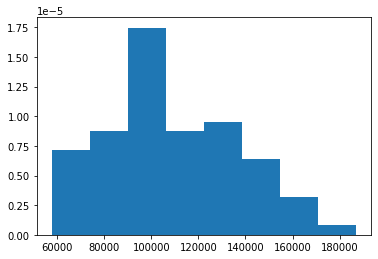

In [113]:
#Use matplotlib to draw a histogram of a salary data
plt.hist(df['salary'],bins=8, density=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


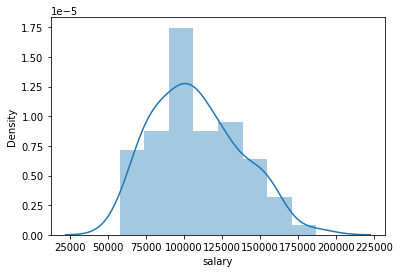

In [114]:
#Use seaborn package to draw a histogram
sns.distplot(df['salary']);

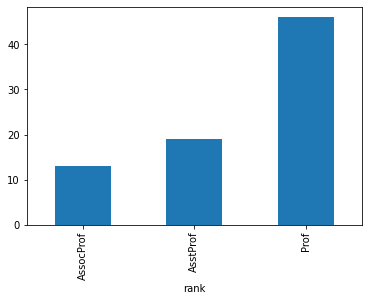

In [115]:
# Use regular matplotlib function to display a barplot
df.groupby(['rank'])['salary'].count().plot(kind='bar')

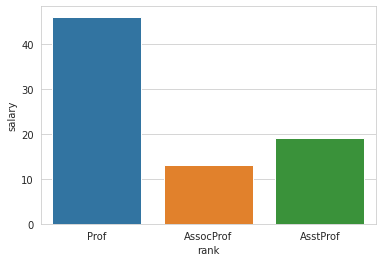

In [116]:
# Use seaborn package to display a barplot
sns.set_style("whitegrid")

ax = sns.barplot(x='rank',y ='salary', data=df, estimator=len)

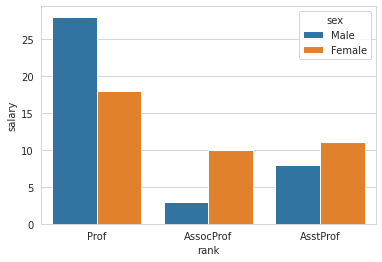

In [117]:
# Split into 2 groups:
ax = sns.barplot(x='rank',y ='salary', hue='sex', data=df, estimator=len)

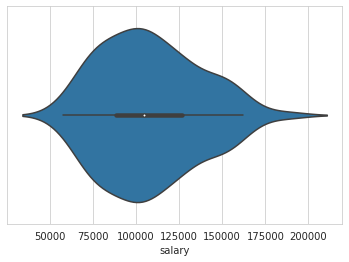

In [118]:
#Violinplot
sns.violinplot(x = "salary", data=df)

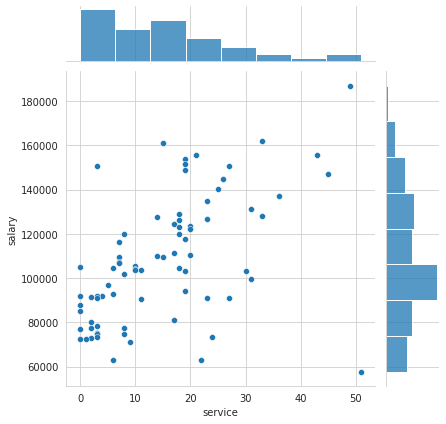

In [119]:
#Scatterplot in seaborn
sns.jointplot(x='service', y='salary', data=df)

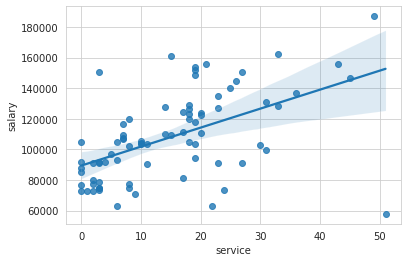

In [120]:
#If we are interested in linear regression plot for 2 numeric variables we can use regplot
sns.regplot(x='service', y='salary', data=df)

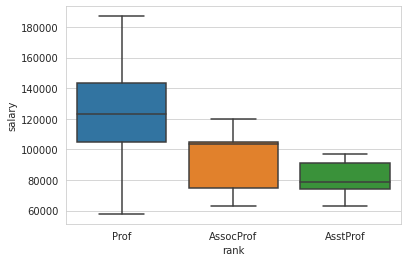

In [121]:
# box plot
sns.boxplot(x='rank',y='salary', data=df)

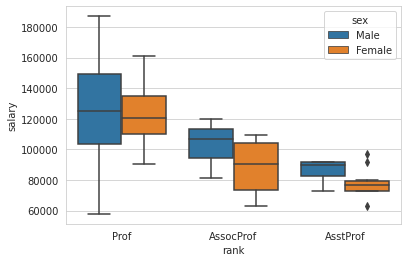

In [122]:
# side-by-side box plot
sns.boxplot(x='rank',y='salary', data=df, hue='sex')

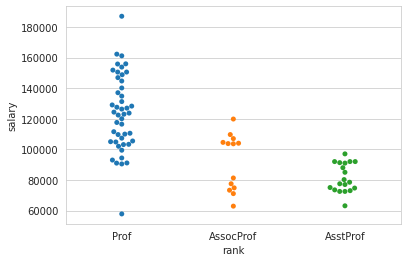

In [123]:
# swarm plot
sns.swarmplot(x='rank',y='salary', data=df)

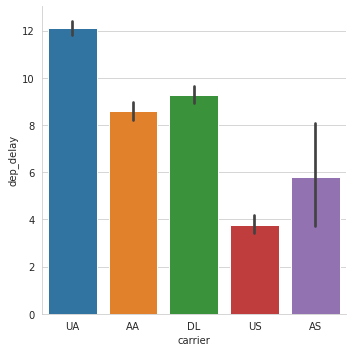

In [124]:
#factorplot
sns.catplot(x='carrier',y='dep_delay', data=flights, kind='bar')

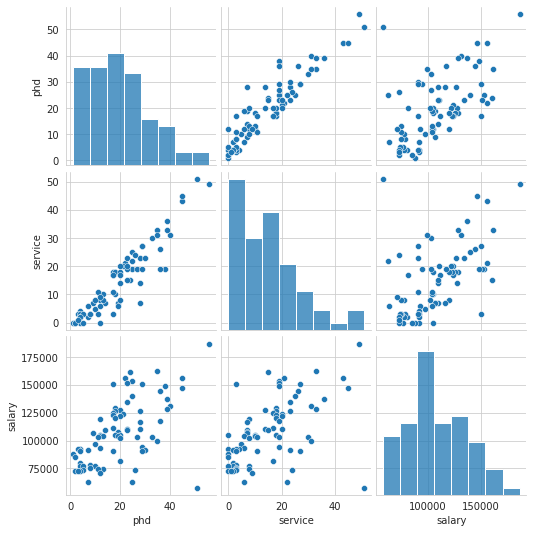

In [125]:
# Pairplot 
sns.pairplot(df)

---
*Exercise*

In [128]:
#Using seaborn package explore the dependency of arr_delay on dep_delay (scatterplot or regplot) using flights dataset

---
## Basic statistical Analysis

### Linear Regression

In [129]:
# Import Statsmodel functions:
import statsmodels.api as sm

In [130]:
# create a fitted model
lm = sm.OLS(df.service, df.salary).fit()

#print model summary
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                service   R-squared (uncentered):                   0.704
Model:                            OLS   Adj. R-squared (uncentered):              0.700
Method:                 Least Squares   F-statistic:                              183.1
Date:                Sat, 08 Oct 2022   Prob (F-statistic):                    4.78e-22
Time:                        14:42:25   Log-Likelihood:                         -294.05
No. Observations:                  78   AIC:                                      590.1
Df Residuals:                      77   BIC:                                      592.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [131]:
# print the coefficients
lm.params

salary    0.000145
dtype: float64

In [132]:
#using scikit-learn:
from sklearn import linear_model
est = linear_model.LinearRegression(fit_intercept = True)   # create estimator object
est.fit(df[['service']], df[['salary']])

#print result
print("Coef:", est.coef_, "\nIntercept:", est.intercept_)


Coef: [[1240.3566535]] 
Intercept: [89354.82421525]


---
*Exercise* 

In [136]:
# Build a linear model for arr_delay ~ dep_delay


---
### Student T-test

In [135]:
# Using scipy package:
from scipy import stats
df_w = df[ df['sex'] == 'Female']['salary']
df_m = df[ df['sex'] == 'Male']['salary']
stats.ttest_ind(df_w, df_m)   

Ttest_indResult(statistic=-2.2486865976699053, pvalue=0.027429778657910103)